# Example program: Recurse

In 2019, I installed air temperature sensors in the tropics of Ecuador to investigate the impacts of human activity on ecosystems and biodiversity. Measurements were collected from rainforest sites and agricultural sites over a period of two years.

Sensors were installed at 4 different heights at each site, from the ground to the canopy, to develop vertical air temperature profiles. The data were logged every five minutes.

The ‘airtemp_testdata.csv’ contains sample data from the oil palm agriculture site. In this example, we include one-month of data collected by two sensors placed in the ground and canopy.

### How it works

This program will read the csv of sample air temperature data and resample the time series data into 30-minute intervals for analysis of diurnal air temperature evolution.

We plot the data as a function of height and time of day. This exercise is in preparation for subsequent analysis with air temperature collections from adjacent tropical forest sites.

Heights are in meter units. Air temperatures in degrees Celsius.

In [22]:
import os
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import matplotlib.dates as md
import seaborn as sns
import datetime as dt

### Import data and setup

In [23]:
#define filepath
filepath = r"C:\Users\dstes\DTdesktop\Employment\Opportunities\Recurse\airtemp_testdata.csv"

In [24]:
#import data and store in a Pandas dataframe
df = pd.read_csv(filepath)
df

,collection,acquisition,ch_id,height,temp
0,1,10/1/2019 0:01,1,0,23.158282
1,2,10/1/2019 0:06,1,0,23.089567
2,3,10/1/2019 0:11,1,0,23.041423
3,4,10/1/2019 0:16,1,0,23.133571
4,5,10/1/2019 0:21,1,0,23.082534
...,...,...,...,...,...
17851,17852,10/31/2019 23:39,2,6,23.188587
17852,17853,10/31/2019 23:44,2,6,23.141868
17853,17854,10/31/2019 23:49,2,6,23.138982
17854,17855,10/31/2019 23:54,2,6,23.151427


In [25]:
#check the dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17856 entries, 0 to 17855
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   collection   17856 non-null  int64  
 1   acquisition  17856 non-null  object 
 2   ch_id        17856 non-null  int64  
 3   height       17856 non-null  int64  
 4   temp         17856 non-null  float64
dtypes: float64(1), int64(3), object(1)
memory usage: 697.6+ KB


In [26]:
#add 'datetime' column and convert acquitision time to datetime format
df['datetime'] = pd.to_datetime(df['acquisition'], utc=False) 

#create a 'time of day' column by dropping the date
df['time'] = df['datetime'].dt.time
time_fmt = "%H:%M:%S" #match format in dataframe
df['diurnal'] = pd.to_datetime(df['time'], format=time_fmt, utc=False)
df 

,collection,acquisition,ch_id,height,temp,datetime,time,diurnal
0,1,10/1/2019 0:01,1,0,23.158282,2019-10-01 00:01:00,00:01:00,1900-01-01 00:01:00
1,2,10/1/2019 0:06,1,0,23.089567,2019-10-01 00:06:00,00:06:00,1900-01-01 00:06:00
2,3,10/1/2019 0:11,1,0,23.041423,2019-10-01 00:11:00,00:11:00,1900-01-01 00:11:00
3,4,10/1/2019 0:16,1,0,23.133571,2019-10-01 00:16:00,00:16:00,1900-01-01 00:16:00
4,5,10/1/2019 0:21,1,0,23.082534,2019-10-01 00:21:00,00:21:00,1900-01-01 00:21:00
...,...,...,...,...,...,...,...,...
17851,17852,10/31/2019 23:39,2,6,23.188587,2019-10-31 23:39:00,23:39:00,1900-01-01 23:39:00
17852,17853,10/31/2019 23:44,2,6,23.141868,2019-10-31 23:44:00,23:44:00,1900-01-01 23:44:00
17853,17854,10/31/2019 23:49,2,6,23.138982,2019-10-31 23:49:00,23:49:00,1900-01-01 23:49:00
17854,17855,10/31/2019 23:54,2,6,23.151427,2019-10-31 23:54:00,23:54:00,1900-01-01 23:54:00


In [27]:
#check to make sure new columns are in 'datetime' format
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17856 entries, 0 to 17855
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   collection   17856 non-null  int64         
 1   acquisition  17856 non-null  object        
 2   ch_id        17856 non-null  int64         
 3   height       17856 non-null  int64         
 4   temp         17856 non-null  float64       
 5   datetime     17856 non-null  datetime64[ns]
 6   time         17856 non-null  object        
 7   diurnal      17856 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(3), object(2)
memory usage: 1.1+ MB


## Plot the raw data

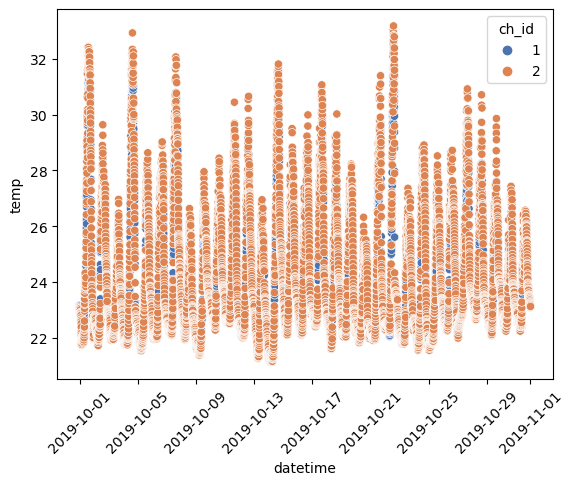

In [28]:
sns.scatterplot(data=df, x='datetime', y='temp', hue='ch_id', palette='deep')
plt.xticks(rotation=45);

In [29]:
#put each sensor into its own dataframe to process data separately
ch1 = df.loc[(df['ch_id'] == 1)]
ch2 = df.loc[(df['ch_id'] == 2)]

In [30]:
ch1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8928 entries, 0 to 8927
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   collection   8928 non-null   int64         
 1   acquisition  8928 non-null   object        
 2   ch_id        8928 non-null   int64         
 3   height       8928 non-null   int64         
 4   temp         8928 non-null   float64       
 5   datetime     8928 non-null   datetime64[ns]
 6   time         8928 non-null   object        
 7   diurnal      8928 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(3), object(2)
memory usage: 627.8+ KB


### channel 1 processing

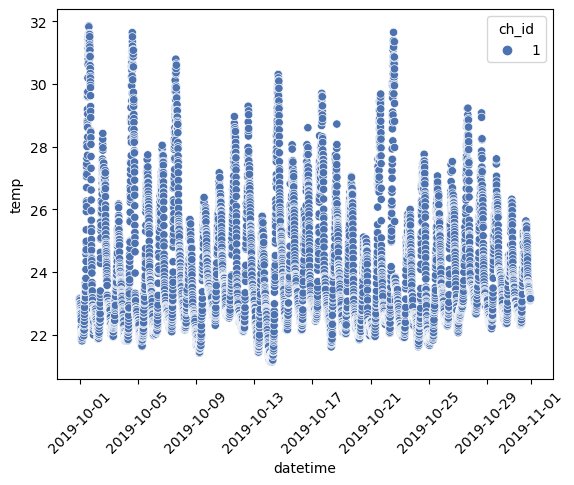

In [31]:
#firsts check the data
sns.scatterplot(data=ch1, x='datetime', y='temp', hue='ch_id', palette='deep')
plt.xticks(rotation=45);

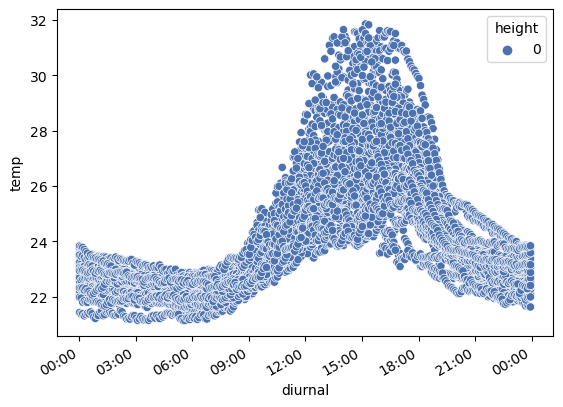

In [32]:
#plot by 24-hour diurnal cycle (no dates)
sns.scatterplot(data=ch1, x='diurnal', y='temp', hue='height', palette='deep')

plt.gcf().autofmt_xdate()
myFmt = md.DateFormatter('%H:%M')
plt.gca().xaxis.set_major_formatter(myFmt)

### Resample data from 5-minute collections to 30-minute intervals

In [33]:
ch1_res = ch1.groupby('diurnal').mean(numeric_only=True).resample('30min').mean()
ch1_res

,collection,ch_id,height,temp
diurnal,,,,
1900-01-01 00:00:00,4323.5,1.0,0.0,22.770060
1900-01-01 00:30:00,4329.5,1.0,0.0,22.693836
1900-01-01 01:00:00,4335.5,1.0,0.0,22.620180
1900-01-01 01:30:00,4341.5,1.0,0.0,22.577861
1900-01-01 02:00:00,4347.5,1.0,0.0,22.517019
1900-01-01 02:30:00,4353.5,1.0,0.0,22.446772
1900-01-01 03:00:00,4359.5,1.0,0.0,22.381440
1900-01-01 03:30:00,4365.5,1.0,0.0,22.352312
1900-01-01 04:00:00,4371.5,1.0,0.0,22.312790


(20.0, 30.0)

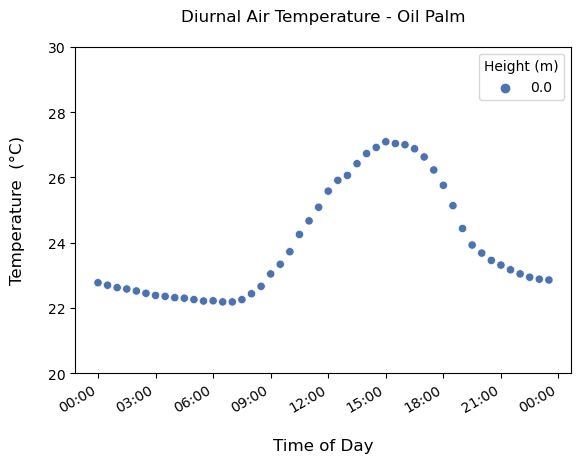

In [34]:
#plot resampled data and clean up axes and legend labels
sns.scatterplot(data=ch1_res, x='diurnal', y='temp', hue='height', palette='deep')

plt.gcf().autofmt_xdate()
myFmt = md.DateFormatter('%H:%M')
plt.gca().xaxis.set_major_formatter(myFmt)

plt.xticks(fontsize=10)
plt.xlabel('\nTime of Day', fontsize=12)
plt.yticks(fontsize=10)
plt.ylabel('Temperature  (°C)\n', fontsize=12)
plt.legend(title='Height (m)', title_fontsize=10, fontsize=10)
plt.title('Diurnal Air Temperature - Oil Palm\n', fontsize=12)
plt.ylim([20,30])

## channel 2 processing

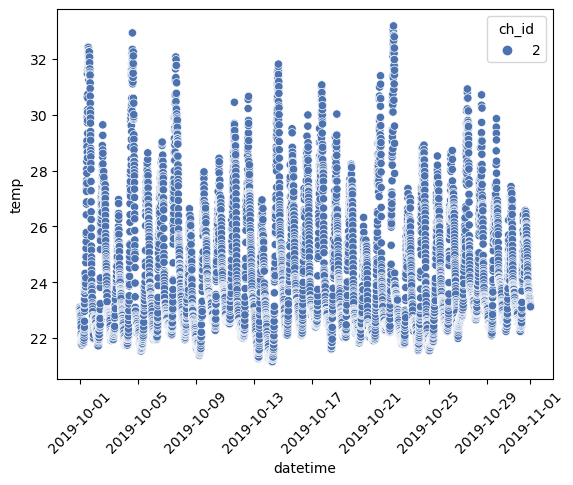

In [35]:
#firsts check the data
sns.scatterplot(data=ch2, x='datetime', y='temp', hue='ch_id', palette='deep')
plt.xticks(rotation=45);

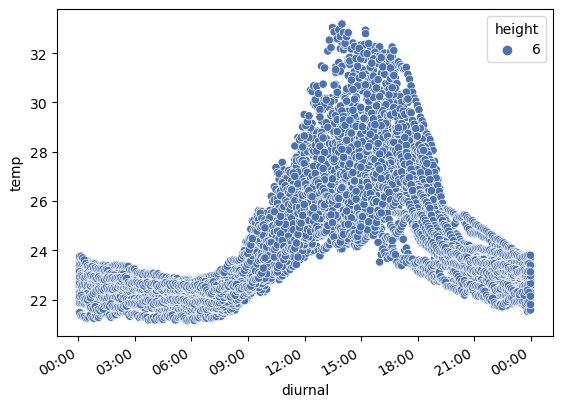

In [36]:
#plot by 24-hour diurnal cycle (no dates)
sns.scatterplot(data=ch2, x='diurnal', y='temp', hue='height', palette='deep')

plt.gcf().autofmt_xdate()
myFmt = md.DateFormatter('%H:%M')
plt.gca().xaxis.set_major_formatter(myFmt)

### Resample data from 5-minute collections to 30-minute intervals

In [37]:
ch2_res = ch2.groupby('diurnal').mean(numeric_only=True).resample('30min').mean()
ch2_res

,collection,ch_id,height,temp
diurnal,,,,
1900-01-01 00:00:00,13251.5,2.0,6.0,22.713446
1900-01-01 00:30:00,13257.5,2.0,6.0,22.640372
1900-01-01 01:00:00,13263.5,2.0,6.0,22.574038
1900-01-01 01:30:00,13269.5,2.0,6.0,22.516673
1900-01-01 02:00:00,13275.5,2.0,6.0,22.472666
1900-01-01 02:30:00,13281.5,2.0,6.0,22.393107
1900-01-01 03:00:00,13287.5,2.0,6.0,22.317709
1900-01-01 03:30:00,13293.5,2.0,6.0,22.283591
1900-01-01 04:00:00,13299.5,2.0,6.0,22.258290


(20.0, 30.0)

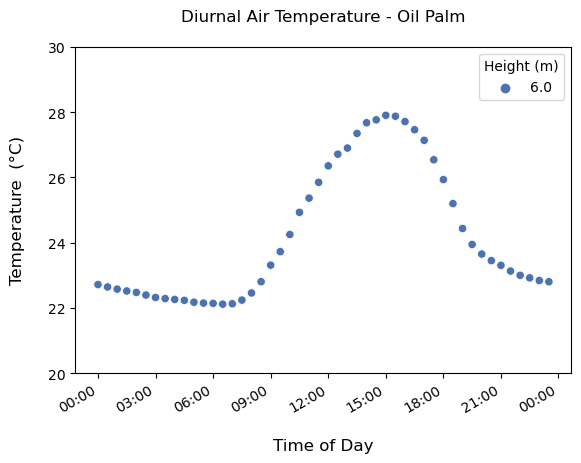

In [38]:
#plot resampled data and clean up axes and legend labels
sns.scatterplot(data=ch2_res, x='diurnal', y='temp', hue='height', palette='deep')

plt.gcf().autofmt_xdate()
myFmt = md.DateFormatter('%H:%M')
plt.gca().xaxis.set_major_formatter(myFmt)

plt.xticks(fontsize=10)
plt.xlabel('\nTime of Day', fontsize=12)
plt.yticks(fontsize=10)
plt.ylabel('Temperature  (°C)\n', fontsize=12)
plt.legend(title='Height (m)', title_fontsize=10, fontsize=10)
plt.title('Diurnal Air Temperature - Oil Palm\n', fontsize=12)
plt.ylim([20,30])

## Put data back together 

In [39]:
df_remerge = pd.concat([ch1_res,ch2_res])

(20.0, 30.0)

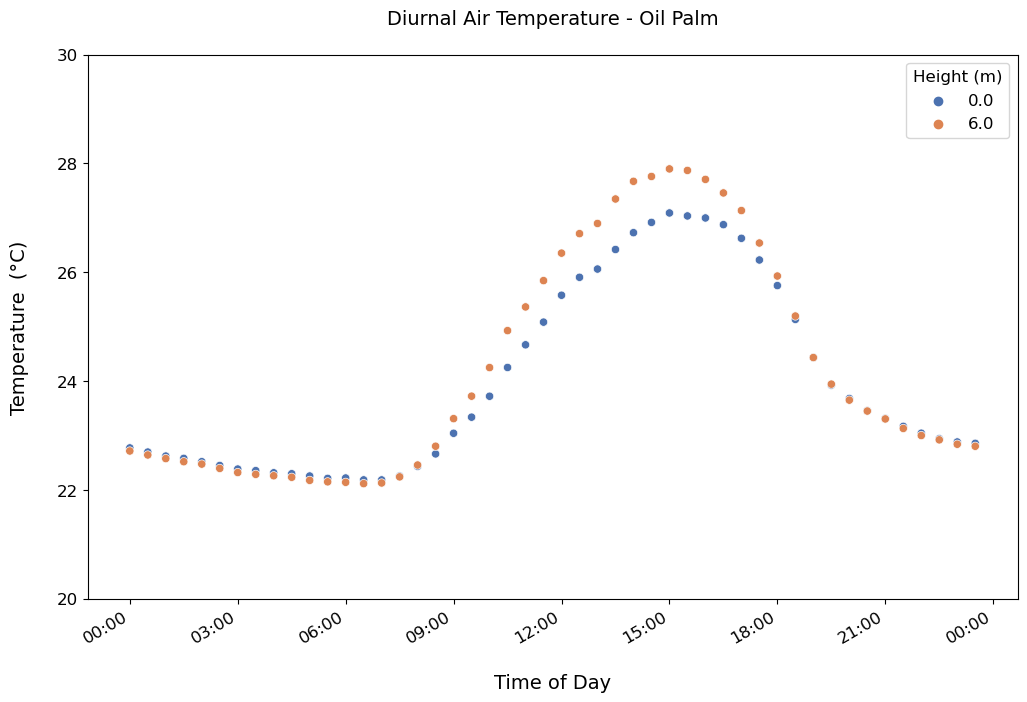

In [40]:
#plot both sensor data together to view air temperature differences by height
plt.figure(figsize=(12,8))
sns.scatterplot(data=df_remerge, x='diurnal', y='temp', hue='height', palette='deep')

plt.gcf().autofmt_xdate()
myFmt = md.DateFormatter('%H:%M')
plt.gca().xaxis.set_major_formatter(myFmt)

plt.xticks(fontsize=12)
plt.xlabel('\nTime of Day', fontsize=14)
plt.yticks(fontsize=12)
plt.ylabel('Temperature  (°C)\n', fontsize=14)
plt.legend(title='Height (m)', title_fontsize=12, fontsize=12)
plt.title('Diurnal Air Temperature - Oil Palm\n', fontsize=14)
plt.ylim([20,30])

(20.0, 30.0)

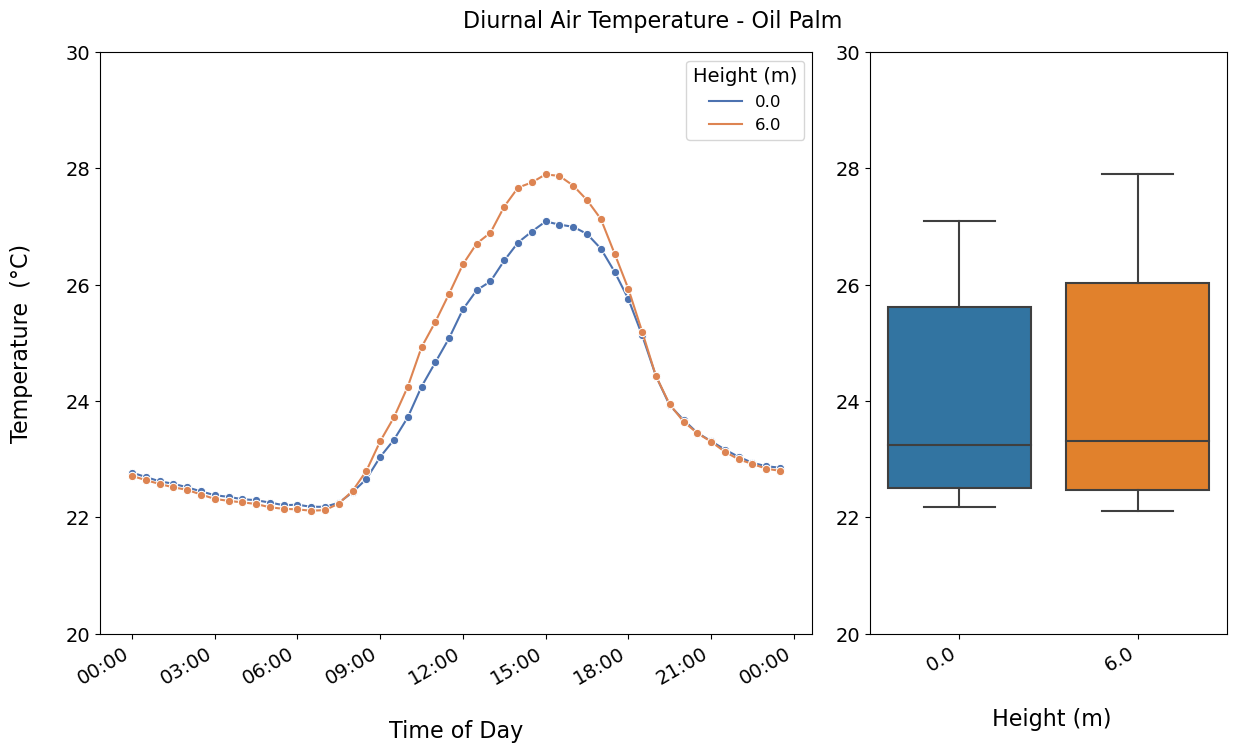

In [41]:
#make subplots of a lineplot and boxplot to compare data
fig, axes = plt.subplots(1, 2, figsize=(12,8), gridspec_kw=dict(width_ratios=[2, 1]))
fig.suptitle('Diurnal Air Temperature - Oil Palm', fontsize=16)
fig.tight_layout()

plt.gcf().autofmt_xdate()
myFmt = md.DateFormatter('%H:%M')
axes[0].xaxis.set_major_formatter(myFmt)

#lineplots
sns.lineplot(ax= axes[0], data=df_remerge, x='diurnal', y='temp', hue='height', marker='o', palette='deep')

axes[0].tick_params(axis= 'both', labelsize = 14)
axes[0].set_xlabel('\nTime of Day', fontsize=16)
axes[0].set_ylabel('Temperature  (°C)\n', fontsize=16)
axes[0].set_ylim([20,30])
axes[0].legend(title='Height (m)', title_fontsize=14, fontsize=12)


#boxplot
sns.boxplot(data=df_remerge, x='height', y='temp')#, hue='height', palette='deep')

axes[1].tick_params(axis= 'both', labelsize = 14)
axes[1].set_xlabel('\n Height (m)', fontsize=16)
axes[1].set_ylabel(None)
axes[1].set_ylim([20,30])

In [42]:
#Determine the differences between ground and canopy air temperatures in the morning and afternoon
print('Min temperature at ground level:', round(ch1_res['temp'].min(),1))
print('Min temperature at 6 meters height:', round(ch2_res['temp'].min(),1))
print('Morning air temperature difference:', round((ch2_res['temp'].min()-ch1_res['temp'].min()),1))
print()
print('Max temperature at ground level:', round(ch1_res['temp'].max(),1))
print('Max temperature at 6 meters height:', round(ch2_res['temp'].max(),1))
print('Afternoon air temperature difference:', round((ch2_res['temp'].max()-ch1_res['temp'].max()),1))

Min temperature at ground level: 22.2
Min temperature at 6 meters height: 22.1
Morning air temperature difference: -0.1

Max temperature at ground level: 27.1
Max temperature at 6 meters height: 27.9
Afternoon air temperature difference: 0.8


### Congrats!

We have successfully processed and plotted the resampled data!

We observe that at the coldest part of the day (near sunrise, ~ 6:30am in the tropics) the air temperature is the same at all locations. However, in the afternoon (3:00pm) there is a 0.8 degree difference in air temperature between the ground and the canopy

We can continue this analysis by applying this code to process the air temperature data from the rainforest site. Then, we can compare the difference in vertical air temperature profiles as a function of land cover type and human intervention. To be continued...